# **COMPARATIVE CLASSIFICATION OF QUALITATIVE AND QUANTITATIVE FEATURES OF SONGS AND VISUALIZATION OF FEATURES**

# **SUBMITTED BY:**
# SIDDHARTH THAKUR - 20BCE1144

# IMPORTING PACKAGES AND DATASET

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_frame = pd.read_csv("song.csv")

In [3]:
data_frame.columns

Index(['id', 'name', 'duration_ms', 'artists', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo', 'time_signature', 'popularity', 'like'],
      dtype='object')

In [9]:
Features = ['key', 'mode', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
Target = ["like"]

In [10]:
#Split dataset to Training Set & Test Set
from sklearn.model_selection import train_test_split

X = data_frame[Features]
y = data_frame[Target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size = 0.8, 
                        test_size = 0.2, 
                        random_state= 10)



x1 = X_train[Features]    #Features to train
x2 = y_train[Target]      #Target Class to test
y1 = X_test[Features]    #Features to test
y2 = y_test[Target]      #Target Class to test

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,y)

In [12]:
df_scores= pd.DataFrame(fit.scores_*100)
df_columns= pd.DataFrame(X.columns)

In [13]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
7,time_signature,0.371976
2,speechiness,1.407587
5,valence,2.916465
3,acousticness,3.532265
0,key,7.771609
4,liveness,19.618293
1,mode,83.963936
6,tempo,704.284628
8,popularity,2365.200123


In [14]:
Features = ['key', 'mode', 'acousticness','liveness', 'tempo', 'popularity']
Target = ["like"]

In [15]:
#Split dataset to Training Set & Test Set
from sklearn.model_selection import train_test_split

X = data_frame[Features]
y = data_frame[Target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size = 0.8, 
                        test_size = 0.2, 
                        random_state= 10)



x1 = X_train[Features]    #Features to train
x2 = y_train[Target]      #Target Class to test
y1 = X_test[Features]    #Features to test
y2 = y_test[Target]      #Target Class to test

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz 
from matplotlib import pyplot as plt

In [17]:
# create a DecisionTreeClassifier object
clf = DecisionTreeClassifier(random_state=10)

# fit the model to the data
clf.fit(X_train, y_train)

# make predictions on the test set
result = clf.predict(X_test)

In [18]:
# Model Evaluation
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [54]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)
print("========== Decision Tree Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== Decision Tree Results ==========
Accuracy    : 0.9001994062126114
Recall      : 0.9001994062126114
Precision   : 0.5003985425705003
F1 Score    : 0.5001994062126114


In [20]:
from sklearn import tree
textrepresentation = tree.export_text(clf)
print(textrepresentation)

|--- feature_3 <= 0.02
|   |--- class: 1
|--- feature_3 >  0.02
|   |--- feature_2 <= 0.00
|   |   |--- feature_5 <= 15.50
|   |   |   |--- feature_4 <= 132.61
|   |   |   |   |--- feature_2 <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  0.00
|   |   |   |   |   |--- feature_4 <= 115.32
|   |   |   |   |   |   |--- feature_5 <= 12.50
|   |   |   |   |   |   |   |--- feature_3 <= 0.33
|   |   |   |   |   |   |   |   |--- feature_4 <= 114.52
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  114.52
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3 >  0.33
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_5 >  12.50
|   |   |   |   |   |   |   |--- feature_4 <= 86.24
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  86.24
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feat

In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [22]:
#### logistic regression

#fitting LR to training set

from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train, y_train)

#Predict the test set results

result=classifier.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)
print("========== Logistic Regression Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Logistic Regression Results ==========
Accuracy    : 0.9116320290689945
Recall      : 0.9116320290689945
Precision   : 0.9058700266893869
F1 Score    : 0.9116320290689945


In [24]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
rf_model = RandomForestClassifier(n_estimators=100, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y1)

<ipython-input-24-9a3d2a277d28>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X=x1,


In [53]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)
print("========== Random Forest Results ==========")

print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Random Forest Results ==========
Accuracy    : 0.9025479682722559
Recall      : 0.9025479682722559
Precision   : 0.9009508838040566
F1 Score    : 0.9025479682722559


In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_model.estimators_[99],
               filled = True);
fig.savefig('rf_individualtree.png')

In [27]:
# K-Nearest Neighbors
# Create Model with configuration 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y1) 

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)
print("========== KNN Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== KNN Results ==========
Accuracy    : 0.9049851553152834
Recall      : 0.9049851553152834
Precision   : 0.9058700266893869
F1 Score    : 0.9049851553152834


In [29]:
error_rates = []

for i in np.arange(1, 10):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_train)

    error_rates.append(np.mean(new_predictions != result))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-29-9fc2561ac3d9>:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  error_rates.append(np.mean(new_predictions != result))
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-29-9fc2561ac3d9>:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  error_rates.append(np.mean(new_predictions != result))
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A colu

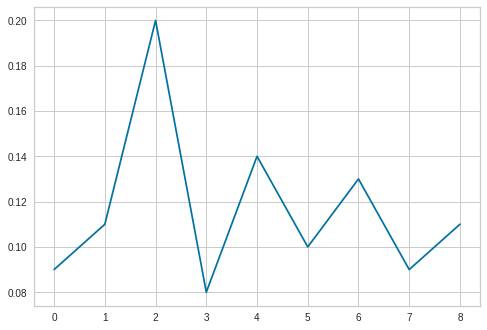

In [33]:
plt.plot(error_rates)

In [34]:
# Neural Network
# Create Model with configuration 
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y1) 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== Neural Network Results ==========
Accuracy    : 0.9018832808968848
Recall      : 0.9018832808968848
Precision   : 0.9069280518548183
F1 Score    : 0.9018832808968848


In [36]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model
# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)   

# Prediction
result = eclf1.predict(y1)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [44]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Voting Model Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Voting Model Results ==========
Accuracy    : 0.9049851553152834
Recall      : 0.9049851553152834
Precision   : 0.9058700266893869
F1 Score    : 0.9049851553152834


In [41]:
from keras.models import Sequential
from keras.layers import Dense
# create the ANN model
model = Sequential()
model.add(Dense(8, input_dim=6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=100)

# evaluate the model on the testing set
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
903/903 [==============================] - 4s 3ms/step - loss: 0.6999
Epoch 2/100
903/903 [==============================] - 2s 3ms/step - loss: 0.6936
Epoch 3/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6933
Epoch 4/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6932
Epoch 5/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6931
Epoch 6/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6931
Epoch 7/100
903/903 [==============================] - 3s 3ms/step - loss: 0.6931
Epoch 8/100
903/903 [==============================] - 2s 3ms/step - loss: 0.6931
Epoch 9/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6930
Epoch 10/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6930
Epoch 11/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6930
Epoch 12/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6930
Epoch 13/100
